In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import openpyxl
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn import svm
import warnings
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
datos = pd.read_excel('/home/erick_castro/Documentos/Inteligencia/Datos.xlsx', sheet_name = "Hoja1")
datos = pd.DataFrame(datos)
datos = datos.dropna(axis = 0, how ="any")
datos.head(10)

,Evento,C1,Duración_(min)_pl,Intensidad_media pl,Intensidad_máxima_pl,Intensidad_continuap_pl,C_(mm_est,Duración_(min)_esta,Intensidad_media_est,Intensidad_máxima_est,...,Hs_80,Hs_100,Lluvia antecedent_24 horas_pluv,Lluvia antecedent_24_horas_esta,Lluvia antecedent_48_horas_pluv,Lluvia_antecedent_48_horas_est,Qmax,Trespuesta_(min)_plub,Trespuesta_est,Q_inicial
0,Evento 1,16.382445,55,17.871758,399.148547,27.132184,12.66,55,13.810909,93.850000,...,0.535343,0.503777,16.382445,13.0,19.460113,13.4,17.246332,105.0,100.0,6.854821
1,Evento 2,15.827108,35,27.132184,312.330000,27.132184,14.80,40,22.200000,84.375000,...,0.540182,0.506062,56.089048,50.2,56.089048,50.2,20.280403,115.0,125.0,7.080917
2,Evento 3,54.700705,1125,2.917371,138.830000,11.285883,47.00,1125,2.506667,109.375000,...,0.552282,0.514057,56.089048,50.2,56.089048,50.2,30.667560,105.0,105.0,7.092906
3,Evento 4,13.883428,105,7.933387,86.771423,7.933387,12.40,95,7.831579,28.125000,...,0.572852,0.534618,1.000000,1.0,1.000000,1.0,15.663358,70.0,65.0,9.328517
4,Evento 5,5.553371,60,5.553371,104.125708,8.554286,5.00,50,6.000000,21.875000,...,0.598261,0.557462,23.324159,18.2,60.809413,50.8,16.910000,75.0,80.0,13.085455
5,Evento 6,24.434833,340,4.312029,173.542846,15.202500,23.40,400,3.510000,44.791667,...,0.581322,0.542613,3.332023,2.8,3.332023,2.8,23.893522,320.0,325.0,11.809956
6,Evento 7,3.054354,55,3.332023,69.417139,6.000000,2.80,65,2.584615,11.458333,...,0.598261,0.550609,26.656181,24.2,29.988204,27.0,14.280000,75.0,80.0,12.886883
7,Evento 8,19.436799,85,13.720093,312.370000,27.600000,15.40,45,20.533333,66.666650,...,0.594631,0.551751,20.269804,19.2,46.925986,43.4,36.390000,55.0,60.0,13.014717
8,Evento 9,5.275703,25,12.661686,69.417139,12.661686,5.00,35,8.571429,25.000000,...,0.600681,0.560889,9.718399,9.0,29.988204,28.2,16.530000,45.0,50.0,13.709470
9,Evento 10,3.609691,50,4.331629,34.708569,4.980000,3.40,65,3.138462,8.333333,...,0.601891,0.560889,9.718399,9.0,29.988204,28.2,17.006422,80.0,85.0,14.355421


In [3]:
logqmax = np.log(datos[["Qmax"]])
logqmax.head()

,Qmax
0,2.847599
1,3.009655
2,3.423205
3,2.751324
4,2.827905


In [4]:
log_expl_var = pd.DataFrame(np.log(datos[["C_(mm_est", 'Lluvia_antecedent_48_horas_est']]))
log_expl_var.head()

,C_(mm_est,Lluvia_antecedent_48_horas_est
0,2.538447,2.595255
1,2.694627,3.916015
2,3.850148,3.916015
3,2.517696,0.000000
4,1.609438,3.927896


In [5]:
train_sizes = [10, 50, 70, 90, 100,125,150,170,190]

In [21]:
features = ['C_(mm_est', 'Lluvia_antecedent_48_horas_est']
target = 'Qmax'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = svm.SVR(kernel='linear', cache_size=400),
X = log_expl_var[features],
y = logqmax[target], train_sizes = train_sizes, cv = 100,
scoring = 'neg_mean_squared_error')

In [22]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.         -0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.00939255 -0.05577306 -0.00838953 ... -0.00838953 -0.00838953
  -0.00838953]
 [-0.02867786 -0.0506466  -0.03150898 ... -0.03248987 -0.03248987
  -0.03248987]
 ...
 [-0.15250466 -0.15546274 -0.1554568  ... -0.14998543 -0.14998543
  -0.14998543]
 [-0.1522131  -0.15501873 -0.15524175 ... -0.15291986 -0.15291986
  -0.15291986]
 [-0.15438881 -0.15713164 -0.15723795 ... -0.15224648 -0.15224648
  -0.15224648]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.17580946 -0.03864599 -0.19832501 ... -1.86095835 -2.19529412
  -4.74878355]
 [-0.2668526  -0.02780248 -0.08356838 ... -0.67129714 -0.99734533
  -2.40976823]
 [-0.20574461 -0.06048998 -0.08455648 ... -0.40400607 -0.68628875
  -1.8594272 ]
 ...
 [-0.20503491 -0.02526252 -0.02579203 ... -0.04724247 -0.21596677
  -0.81101257]
 [-0.20900412 -0.02795022 -0.02593661 ... -0.04687374 -0.21564294
  -0.80

In [23]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1     -0.000000
5      0.008873
9      0.032624
13     0.049166
17     0.081360
21     0.084634
25     0.116707
29     0.108794
33     0.118402
37     0.106425
40     0.101768
44     0.103716
48     0.097684
52     0.102192
56     0.109539
60     0.103662
64     0.103253
68     0.108065
72     0.115938
76     0.129681
79     0.126735
83     0.125494
87     0.122330
91     0.124104
95     0.120118
99     0.124456
103    0.130063
107    0.135041
111    0.138925
115    0.142771
118    0.142874
122    0.143972
126    0.147301
130    0.162935
134    0.167215
138    0.166745
142    0.163222
146    0.161095
150    0.158341
154    0.161306
157    0.159316
161    0.160506
165    0.159699
169    0.161299
173    0.157899
177    0.154919
181    0.151672
185    0.151193
189    0.153280
193    0.152146
dtype: float64

 --------------------

Mean validation scores

 1      0.518100
5      0.281183
9      0.261171
13     0.285335
17     0.316888
21     0.290060
25     0.266537
2

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


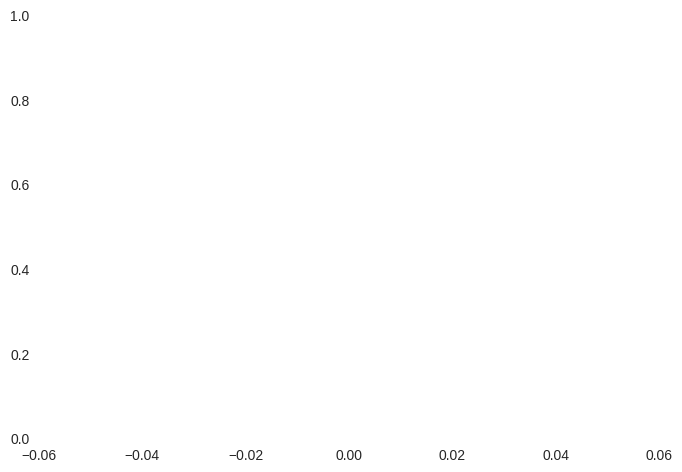

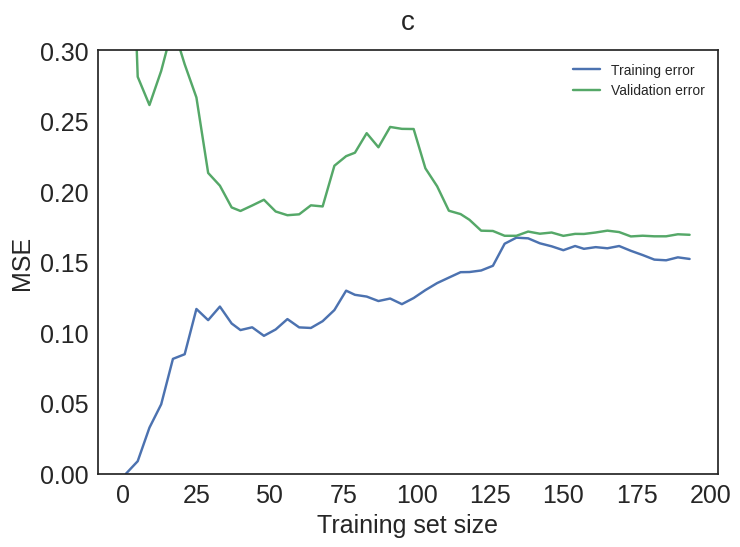

In [24]:
plt.style.use('seaborn')
ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 18)
plt.xlabel('Training set size', fontsize = 18)
plt.title('c', fontsize = 20, y = 1.03)
plt.legend()
plt.ylim(0,0.3)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig("learning_curve_SVM_.jpg", dpi = 500)

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/utils/validation.py

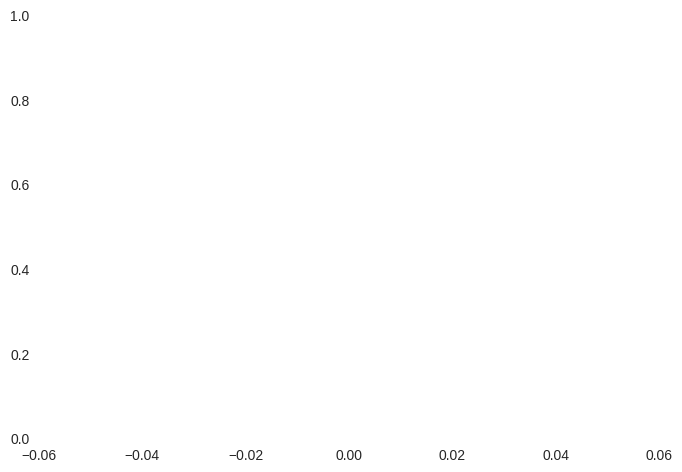

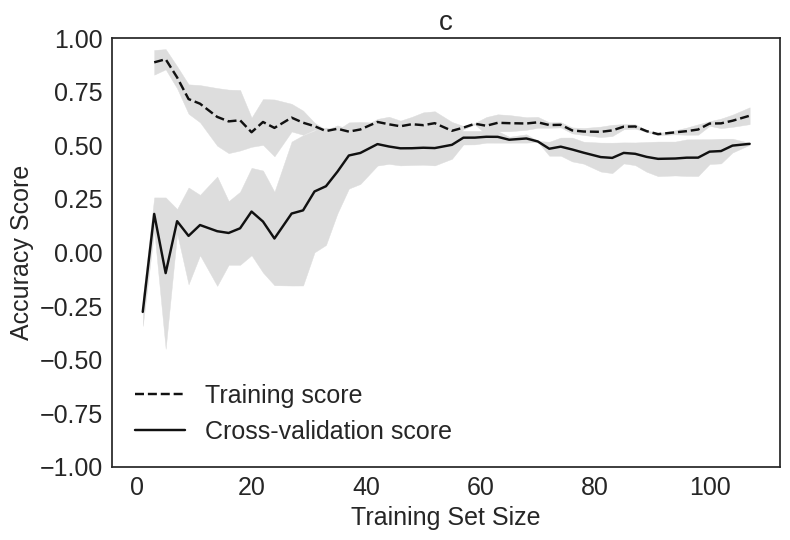

In [30]:
train_sizes, train_scores, test_scores = learning_curve(svm.SVR(kernel='linear', cache_size=400), log_expl_var , logqmax,cv=2, scoring='r2', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.style.use('seaborn')
ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("c", fontsize = 20)
plt.xlabel("Training Set Size", fontsize = 18), plt.ylabel("Accuracy Score", fontsize = 18), plt.legend(loc="best", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.legend(fontsize = 18)
plt.ylim(-1, 1)
plt.tight_layout()
plt.savefig("bias_variance_SVM_.jpg", dpi = 500)

In [31]:
kfold = ShuffleSplit(n_splits=30, test_size=0.3, random_state=1)
model = svm.SVR(kernel='linear', cache_size=400)
results = cross_val_score(model, log_expl_var ,logqmax, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

[0.64312115 0.66032144 0.68666058 0.68868721 0.70895339 0.64780074
 0.63513771 0.59421553 0.62128486 0.5695672  0.71021563 0.64376441
 0.68648486 0.61730475 0.72233811 0.56397532 0.74935295 0.73344392
 0.62296049 0.54763714 0.51787283 0.65800071 0.55266138 0.60104717
 0.76877939 0.75125078 0.59652089 0.65052173 0.63031486 0.65218133]
0.6477459481511778
0.06342870532685753


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [32]:
X_train,X_test, y_train,y_test = train_test_split(log_expl_var,logqmax, random_state=1)
lr=svm.SVR(kernel='linear', cache_size=400)
lr.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


SVR(cache_size=400, kernel='linear')

In [33]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.6484979672780788
Test score: 0.6656525803339998


In [34]:
lc = learning_curve(svm.SVR(kernel='linear', cache_size=400),X_train,y_train,cv=2)
samples, train, test = lc[0], lc[1], lc[2]
lc

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

(array([ 8, 26, 44, 62, 80]),
 array([[0.51675854, 0.5911792 ],
        [0.29891981, 0.73470799],
        [0.53509217, 0.68882652],
        [0.65283184, 0.70310282],
        [0.65286094, 0.64833415]]),
 array([[0.38528185, 0.59932114],
        [0.49910297, 0.6133979 ],
        [0.63623593, 0.62480747],
        [0.63543247, 0.62503129],
        [0.63641505, 0.63056618]]))

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


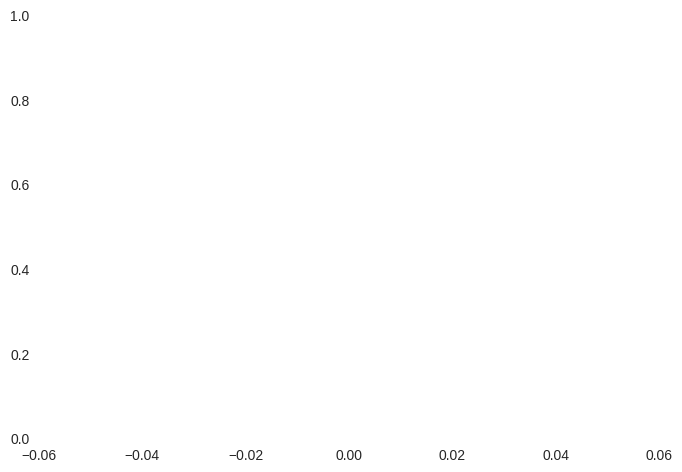

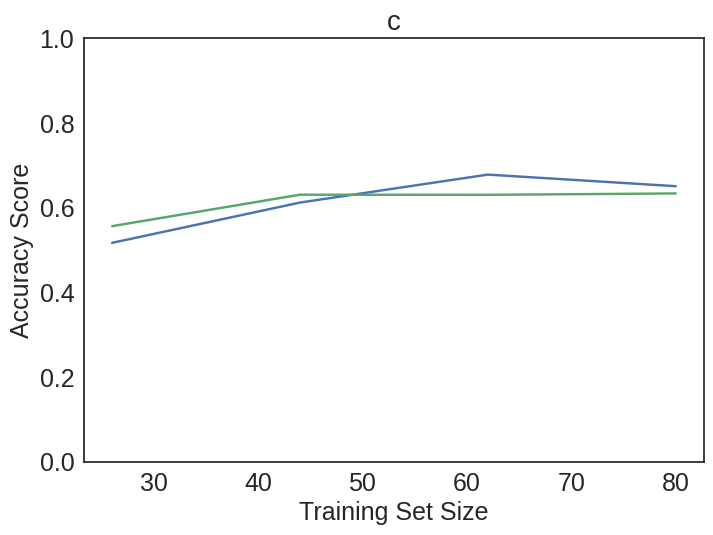

In [35]:
ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:]);
plt.title("c", fontsize = 20)
plt.xlabel("Training Set Size", fontsize = 18), plt.ylabel("Accuracy Score", fontsize =18), plt.legend(loc="best", fontsize = 18)
plt.ylim(0,1)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig("overfitting_SVM_.jpg", dpi = 500)